# 데이터 다운로드

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp /content/gdrive/MyDrive/tmp/flowers_prepared.zip ./

In [4]:
!unzip flowers_prepared.zip

Archive:  flowers_prepared.zip
   creating: test/
   creating: test/daisy/
  inflating: test/daisy/401.jpg      
  inflating: test/daisy/402.jpg      
  inflating: test/daisy/403.jpg      
  inflating: test/daisy/404.jpg      
  inflating: test/daisy/405.jpg      
  inflating: test/daisy/406.jpg      
  inflating: test/daisy/407.jpg      
  inflating: test/daisy/408.jpg      
  inflating: test/daisy/409.jpg      
  inflating: test/daisy/410.jpg      
  inflating: test/daisy/411.jpg      
  inflating: test/daisy/412.jpg      
  inflating: test/daisy/413.jpg      
  inflating: test/daisy/414.jpg      
  inflating: test/daisy/415.jpg      
  inflating: test/daisy/416.jpg      
  inflating: test/daisy/417.jpg      
  inflating: test/daisy/418.jpg      
  inflating: test/daisy/419.jpg      
  inflating: test/daisy/420.jpg      
  inflating: test/daisy/421.jpg      
  inflating: test/daisy/422.jpg      
  inflating: test/daisy/423.jpg      
  inflating: test/daisy/424.jpg      
  inflating: 

In [5]:
!mkdir flowers_prepared
!mv train flowers_prepared/
!mv test flowers_prepared/

# 학습

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 25,433,086
Trainable params: 17,664,005
Non

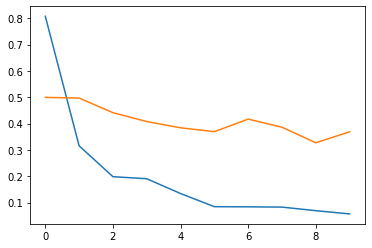

4/4 [==============================] - 0s 95ms/step - loss: 0.3688 - acc: 0.9147
loss= 0.36876899003982544
acc= 0.9146919250488281


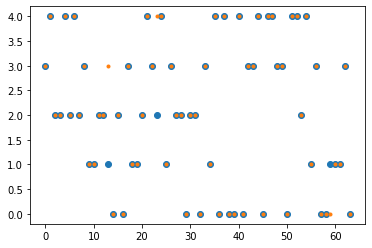

label category index = 3.0
predicted category index = 3
predicted category name = sunflower


In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax')) # <-------------------

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(  
      "flowers_prepared/train", # <-------------------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "flowers_prepared/test", # <-------------------
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])
